# Scikit-learn

If you have not completed the third notebook in this series (02-Jupyter_Pandas), please take some time to review that first. In this notebook, we will introduce the scikit-learn package, which will be helpful in doing some beginnning data analysis.

#### Linear and logistic regression.

Linear regression tries to answer the question: Is there a linear relationship between my predictors and some quantitative response (or output) of the form

\begin{equation}
\underset{\text{ Response }}{y} = A \underset{\text{data}}{X} + b
\end{equation}

Example: Is there a linear relationship between my quiz scores and my exam scores? Can I predict my future exam scores with this information?

Logistic regression tries to answer a similar question, but with a qualitative response (or output) variable. Can I predict if I pass or fail a class based on only my quiz scores?

This notebook primarily focuses on linear regression, but the next notebook (04-Jupyter_Logistic) will introduce some of the basics of that method.

In [2]:
# Let's begin by importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# the new packages for scikit-learn
import scipy.stats as stats
import sklearn
from sklearn.datasets import load_boston       #this loads the boston dataset
from sklearn import linear_model               # for linear regression
from sklearn.metrics import mean_squared_error # to evaluate the model

In [3]:
# let's load the iris dataset
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


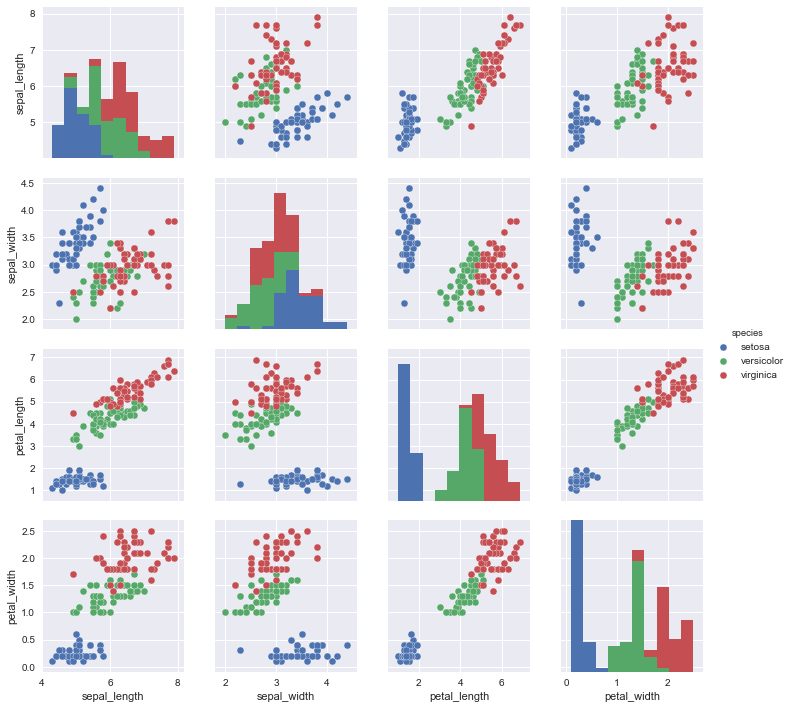

In [4]:
# We can also make a scatter plot color-coded by species
sns.pairplot(iris,  hue='species')

In [6]:
# Suppose we want to study the relationship 
# between petal_width and sepal_length.
iris_X = iris.iloc[:,3].values # petal width
iris_Resp = iris.iloc[:,0].values # sepal length

### Training and Testing data.

##### Question: Why shouldn't we use all the observations to build the model?

In [7]:
# 1) There is the problem of overfitting
# 2) What do you test your model on?
# 3) It could be expensive to get more data.

Training data is used train, or teach, the model to estimate the coefficients (A) and intercepts (b).

Testing data is information that is omitted (or witheld) from the model to predict, or test, how good the model performs on new data.

In [8]:
# Split the data into training/testing sets. Ideas?

# DON'T DO THIS WAY (this can introduce bias)
# iris_X_train = iris_X[:-75] # remove the last 75 entries
# iris_X_test = iris_X[-75:] # remove the first 75 entries
# print(iris_X_train.shape)
# # Split the targets into training/testing sets 
# iris_y_train = iris_Resp[:-125]
# iris_y_test = iris_Resp[-25:]
#print(iris_y_train.shape)
# STOP

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_Resp, test_size=0.4, random_state=0)  

In [9]:
# Create linear regression object
lm = linear_model.LinearRegression()

mytrainX = X_train.reshape(-1,1) #-1 detects the length of the object.
mytrainy = y_train.reshape(-1,1)

# print the resulting shape
#print(iris_X_train.shape)
#print(mytrainX.shape)

# Train the model using the training sets
lm.fit(mytrainX, mytrainy)
print(lm.intercept_) #b
print(lm.coef_) #A
#help(lm.fit)

[ 4.75614107]
[[ 0.93789513]]


([], <a list of 0 Text yticklabel objects>)

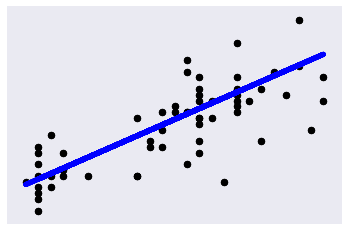

In [10]:
# Make predictions using the testing set
mytestX = X_test.reshape(-1,1)
mytesty = y_test.reshape(-1,1)

iris_y_pred = lm.predict(mytestX)

# Plot outputs
plt.scatter(mytestX, mytesty,  color='black')
plt.plot(mytestX, iris_y_pred, color='blue', linewidth=5)

# The coefficients
#print('Coefficients: \n', lm.coef_)
# The mean squared error
#print("Mean squared error: %.2f"
#     % mean_squared_error(mytesty, iris_y_pred))

# Plot outputs
plt.scatter(mytestX, mytesty,  color='black')
plt.plot(mytestX, iris_y_pred, color='blue', linewidth=5)

plt.xticks(())
plt.yticks(())

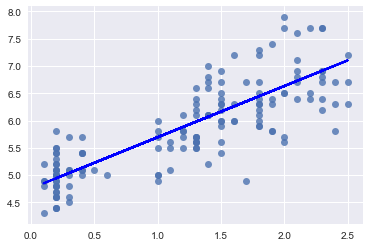

In [11]:
# Let's make the same scatterplot with seaborn.
sns.regplot(x=iris_X,y=iris_Resp, fit_reg=False)
plt.plot(mytestX, iris_y_pred, color='blue', linewidth=2)

Above, we printed the mean squared error,
\begin{equation}
 MSE = \frac{1}{n}\sum_{i=0}^n \sqrt{(y_i - \hat{y_i})^2},
\end{equation}
which is one way to measure the error of your model predictions $\hat{y_i}$ to the ground truth $y_i$ in linear regression, but there are other ways as well.

## Boston Dataset

Let's look at another predefined dataset in Python called the Boston dataset. This dataset can also be found in R.

In [ ]:
# Load the boston dataset
boston = load_boston()

#print(boston.DESCR)
#boston.keys()
#boston.data.shape
#boston.feature_names

In [ ]:
# Let's convert this data to something we are more familiar with
boston_pan = pd.DataFrame(boston.data)
#boston_pan
# how do I look at the first few rows of the data?

In [ ]:
# What are we missing in the pandas dataframe?
boston_pan.columns = boston.feature_names
boston_pan.head()

In [ ]:
sns.pairplot(boston_pan, size=2.5);

In [ ]:

# Question: is there a relationship between distance to employment centers (DIS) and NOX (nitric oxide concentrations)
newbos = pd.DataFrame({'NOX':boston_pan.NOX, 'DIS':boston_pan.DIS})
newbos.head()


In [ ]:
sns.pairplot(newbos, size=2.5);